In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [113]:
# df = pd.read_csv("aaaa.csv")
# display(df)
# print(df["Manufacturer"].value_counts())
# dfa = pd.read_csv("Cars82.csv")
# print(dfa["Manufacturer"].value_counts())
df = pd.read_csv("Cars82.csv")
df = df[["Manufacturer","Origin","Horsepower","Cylinders"]]
display(df)

,Manufacturer,Origin,Horsepower,Cylinders
0,Acura,non-USA,140,4
1,Acura,non-USA,200,6
2,Audi,non-USA,172,6
3,Audi,non-USA,172,6
4,BMW,non-USA,208,4
...,...,...,...,...
77,Volkswagen,non-USA,81,4
78,Volkswagen,non-USA,134,4
79,Volkswagen,non-USA,178,6
80,Volvo,non-USA,114,4


In [114]:
# Origem nao americada e cilindrada <Q2
q2 = np.percentile(df["Cylinders"],50)

meninos = df[(df["Origin"]=="non-USA")&(df["Cylinders"]>q2)]
meninas = df[(df["Origin"]=="USA")&(df["Cylinders"]>q2)]
# Potencia, nao americano, mediana menor

Origin "non-USA" e Horsepower < Median(Horsepower)

In [115]:
potencia_2 = df[(df["Origin"]=="non-USA")&(df["Horsepower"]<np.median(df["Horsepower"]))]
display(potencia_2)

,Manufacturer,Origin,Horsepower,Cylinders
33,Geo,non-USA,55,3
34,Geo,non-USA,90,4
36,Honda,non-USA,102,4
38,Hyundai,non-USA,81,4
39,Hyundai,non-USA,124,4
40,Hyundai,non-USA,92,4
41,Hyundai,non-USA,128,4
47,Mazda,non-USA,82,4
48,Mazda,non-USA,103,4
50,Mercedes-Benz,non-USA,130,4


Meninas: dois grupos com a mesma cilindrada, 4 cilindros, non-USA e USA

Menino: sdois grupos com a mesma cilindrada, 6 cilindros, non-USA e USA

In [116]:
g1 = df[(df['Cylinders']==6)&(df['Origin']=='non-USA')]
g2 = df[(df['Cylinders']==6)&(df['Origin']=='USA')]

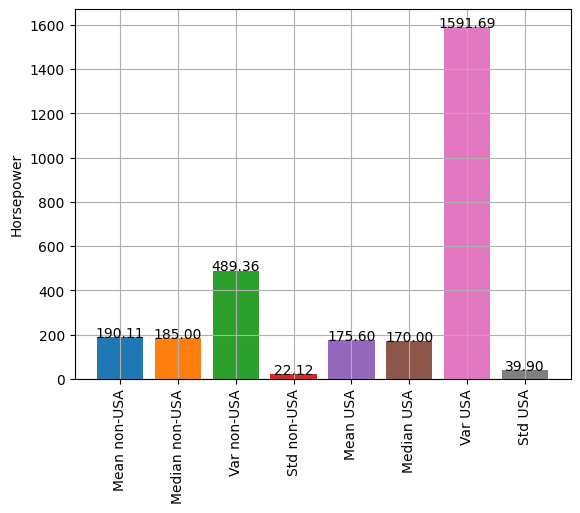

In [117]:
g1_mean = np.mean(g1["Horsepower"])
g2_mean = np.mean(g2["Horsepower"])
g1_median = np.median(g1["Horsepower"])
g2_median = np.median(g2["Horsepower"])
g1_var = np.var(g1["Horsepower"],ddof=1)
g2_var = np.var(g2["Horsepower"],ddof=1)
g1_std = np.std(g1["Horsepower"],ddof=1)
g2_std = np.std(g2["Horsepower"],ddof=1)
plt.ylabel("Horsepower")
plt.bar("Mean non-USA",g1_mean)
plt.text("Mean non-USA",g1_mean,"{:.2f}".format(g1_mean),ha='center')

plt.bar("Median non-USA",g1_median)
plt.text("Median non-USA",g1_median,"{:.2f}".format(g1_median),ha='center')

plt.bar('Var non-USA',g1_var)
plt.text('Var non-USA',g1_var,"{:.2f}".format(g1_var),ha='center')
plt.bar('Std non-USA',g1_std)
plt.text('Std non-USA',g1_std,"{:.2f}".format(g1_std),ha='center')
plt.bar("Mean USA",g2_mean)
plt.text("Mean USA",g2_mean,"{:.2f}".format(g2_mean),ha='center')
plt.bar("Median USA",g2_median)
plt.text("Median USA",g2_median,"{:.2f}".format(g2_median),ha='center')
plt.bar('Var USA',g2_var)
plt.text('Var USA',g2_var,"{:.2f}".format(g2_var),ha='center')
plt.bar('Std USA',g2_std)
plt.text('Std USA',g2_std,"{:.2f}".format(g2_std),ha='center')
# plt.xticks(labelrotation=90)
plt.xticks(rotation=90, ha='center')
plt.grid()
plt.show()

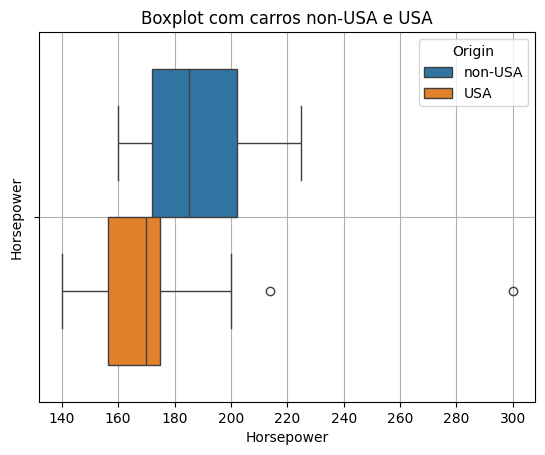

In [118]:
# plt.boxplot([g1["Horsepower"],g2["Horsepower"]],tick_labels=["non-USA","USA"])
sns.boxplot(data=df[df["Cylinders"]==6],x="Horsepower",hue="Origin")
plt.grid()
plt.title("Boxplot com carros non-USA e USA")
plt.ylabel("Horsepower")
plt.show()

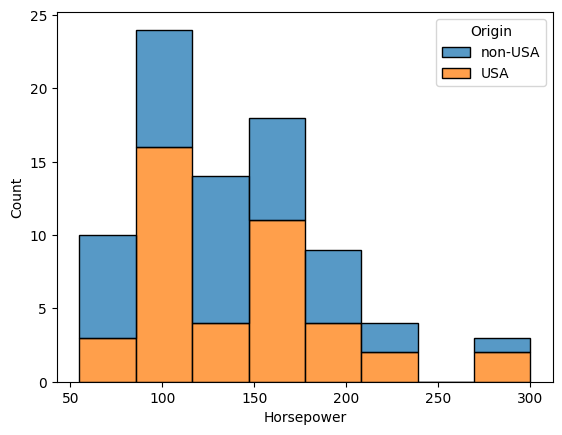

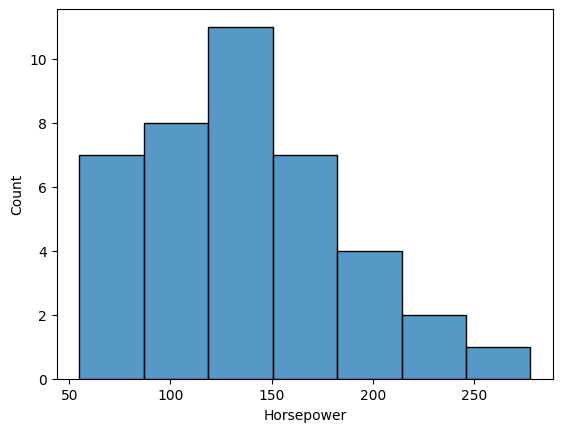

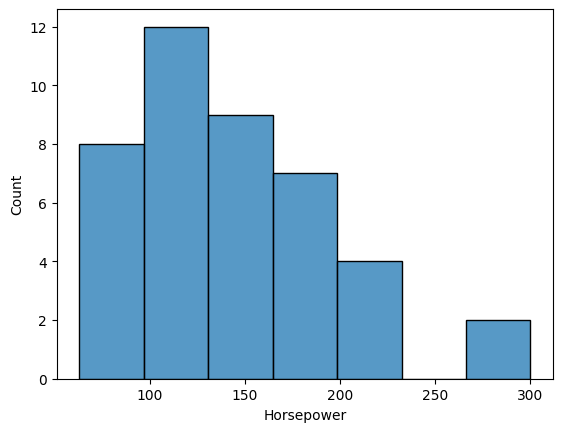

In [119]:

sns.histplot(x='Horsepower',hue="Origin",data=df,multiple='stack')
plt.show()
sns.histplot(x=df[df["Origin"]=="non-USA"]["Horsepower"],multiple='dodge')
plt.show()
sns.histplot(x=df[df["Origin"]=="USA"]["Horsepower"],multiple='dodge')
plt.show()

PearsonRResult(statistic=np.float64(0.7955828590713169), pvalue=np.float64(4.307672927824312e-19))
9.548519644274727
[0.04690845]


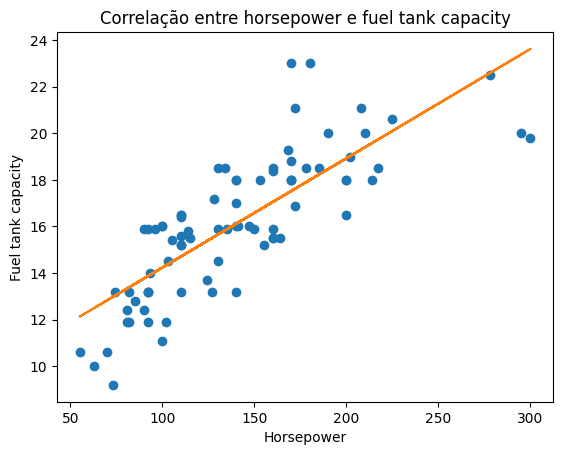

In [120]:
df = pd.read_csv("Cars82.csv")
plt.xlabel("Horsepower")
plt.ylabel("Fuel tank capacity")
plt.plot(df["Horsepower"],df["Fuel.tank.capacity"],"o")
df[["Horsepower","Fuel.tank.capacity"]].corr(method="pearson")
lr = LinearRegression()
lr.fit(X=np.array(df["Horsepower"]).reshape(-1, 1),y=df["Fuel.tank.capacity"])
print(pearsonr(x=df["Horsepower"],y=df["Fuel.tank.capacity"]))
print(lr.intercept_)
print(lr.coef_)
pred = lr.predict(np.array(df["Horsepower"]).reshape(-1, 1))
plt.plot(df["Horsepower"],pred)
plt.title("Correlação entre horsepower e fuel tank capacity")
plt.show()
